# **1. Load the dataset**

In [ ]:
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth

from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

file_download = drive.CreateFile({'id':'1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q'})

file_download.GetContentFile('CC GENERAL.csv')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('CC GENERAL.csv')

###▶ **Analyse and Clean the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

We have two columns that have missing value : *CREDIT_LIMIT(have 1 missing value) and MINIMUM_PAYMENTS(have 313 missing values)*

In [ ]:
df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]

,CREDIT_LIMIT,MINIMUM_PAYMENTS
0,1000.0,139.509787
1,7000.0,1072.340217
2,7500.0,627.284787
3,7500.0,NaN
4,1200.0,244.791237
...,...,...
8945,1000.0,48.886365
8946,1000.0,NaN
8947,1000.0,82.418369
8948,500.0,55.755628


In [ ]:
print(df['CREDIT_LIMIT'].min())
print(df.groupby('CREDIT_LIMIT')['CREDIT_LIMIT'].count())

50.0
CREDIT_LIMIT
50.0        1
150.0       5
200.0       3
300.0      14
400.0       3
           ..
22500.0     1
23000.0     2
25000.0     1
28000.0     1
30000.0     2
Name: CREDIT_LIMIT, Length: 205, dtype: int64


**Fill nan value**

In [ ]:
# fill nan in MINIMUM_PAYMENTS column with the mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [ ]:
#fill nan in CREDIT_LIMIT column with the mode
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##▶ Define features

In [ ]:
features = [i for i in df.columns if i not in ['CUST_ID']]

# **2. Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = df[features]
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster_labels = model.fit_predict(x)
agglom = pd.DataFrame(cluster_labels)
agglom

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


# **3. Plot Cluster**

In [ ]:
import matplotlib.pyplot as plt

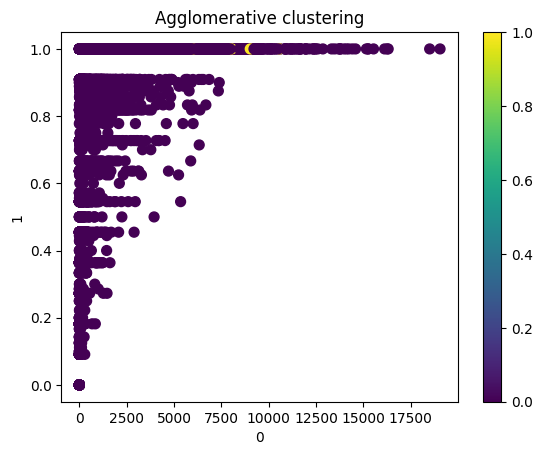

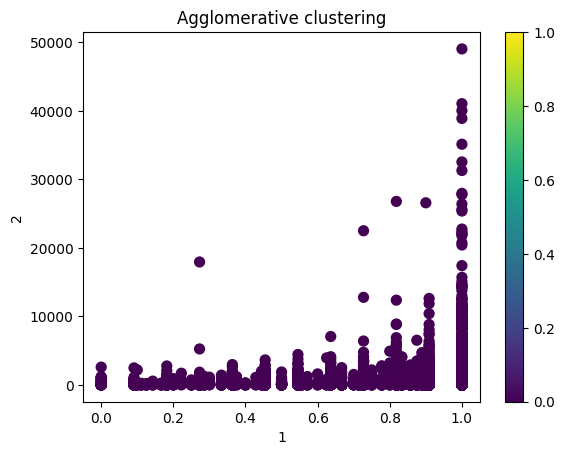

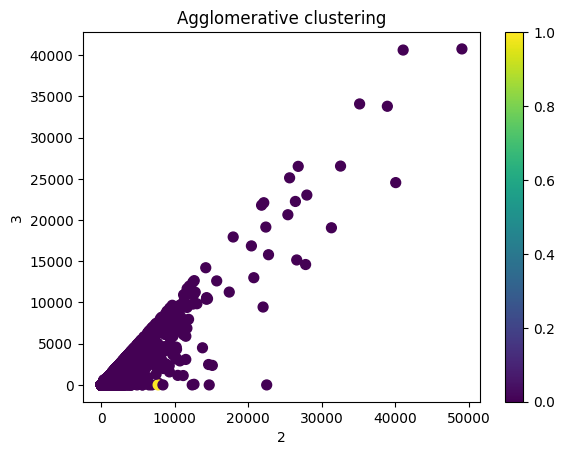

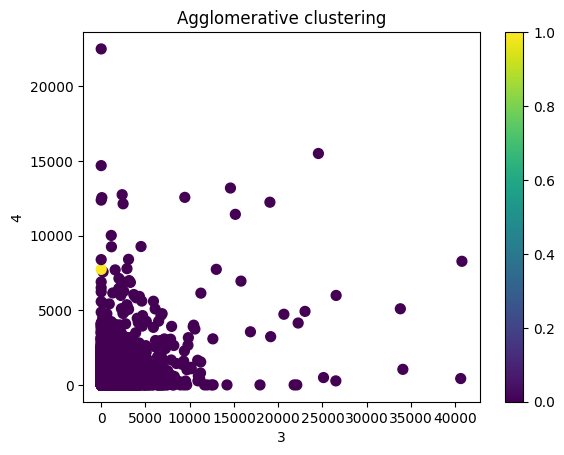

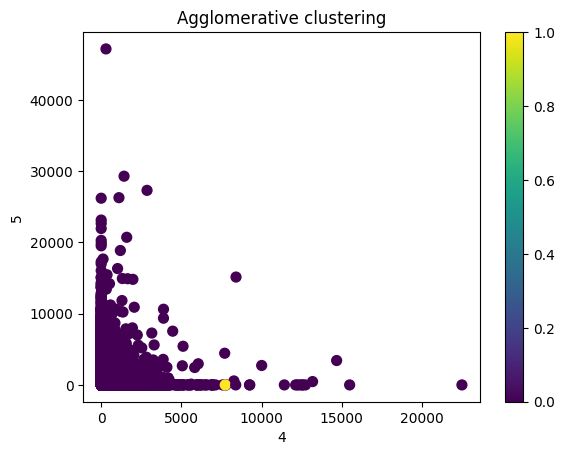

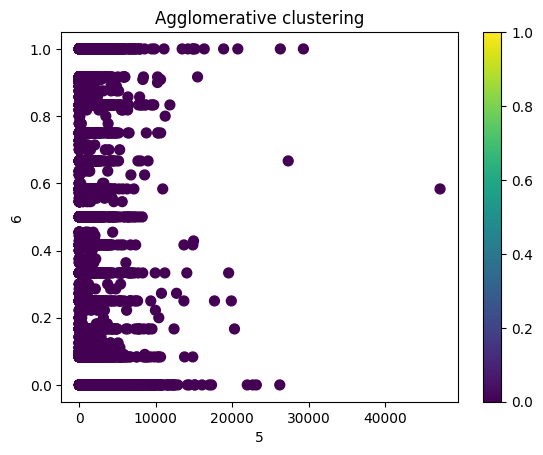

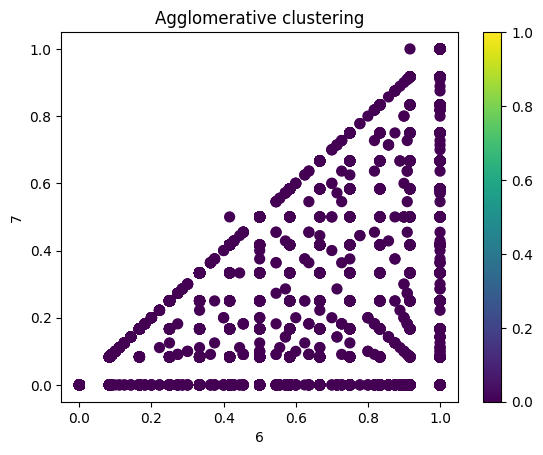

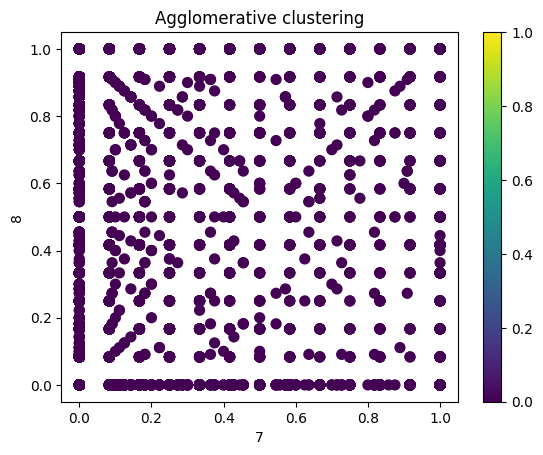

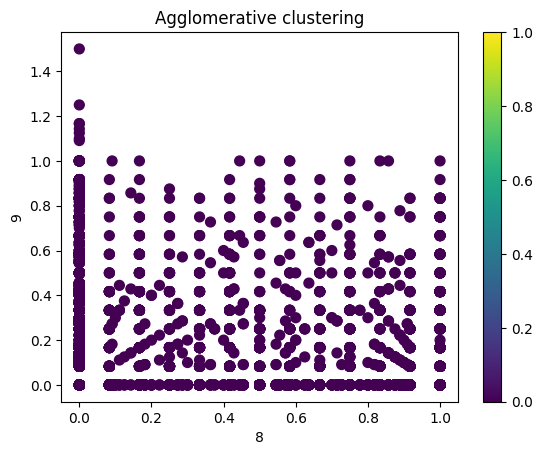

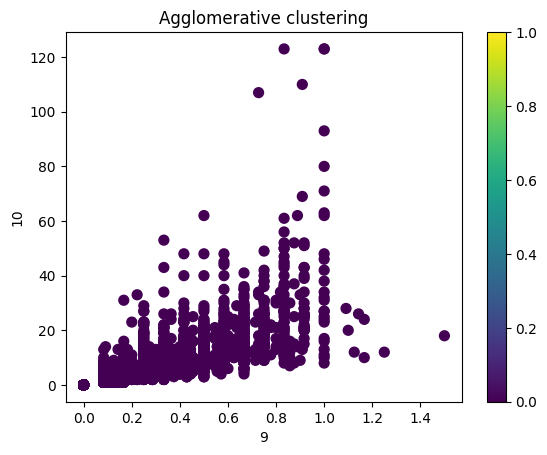

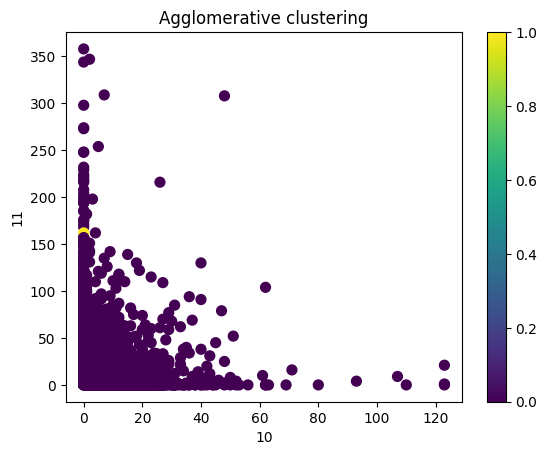

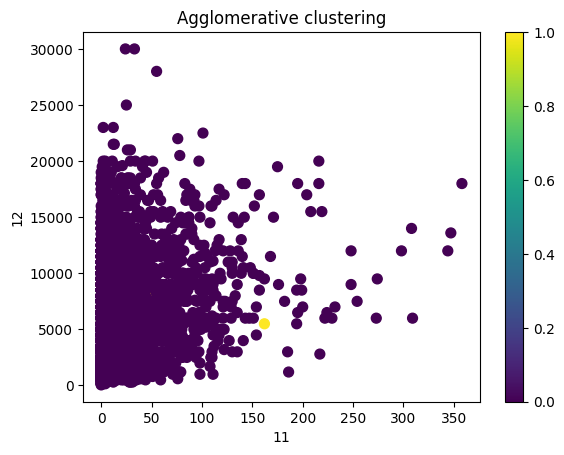

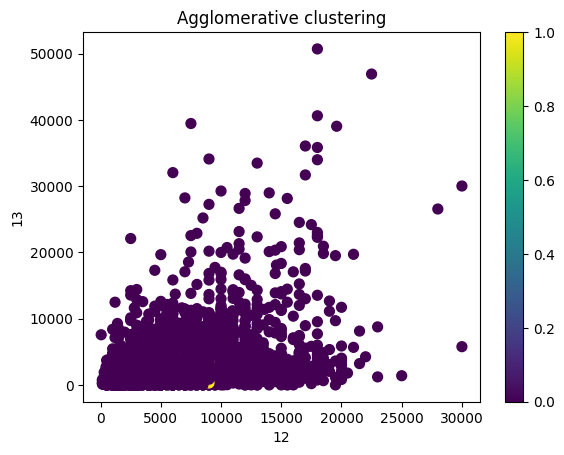

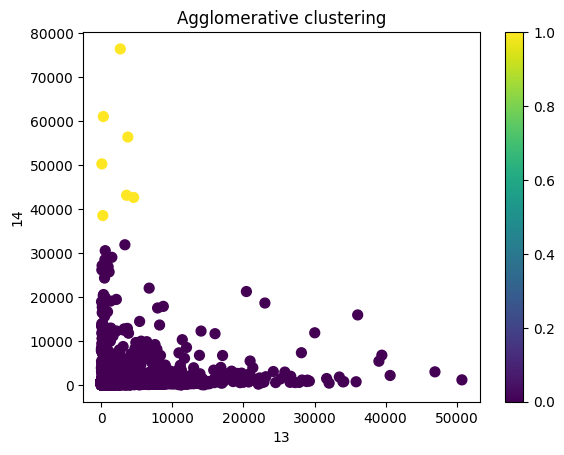

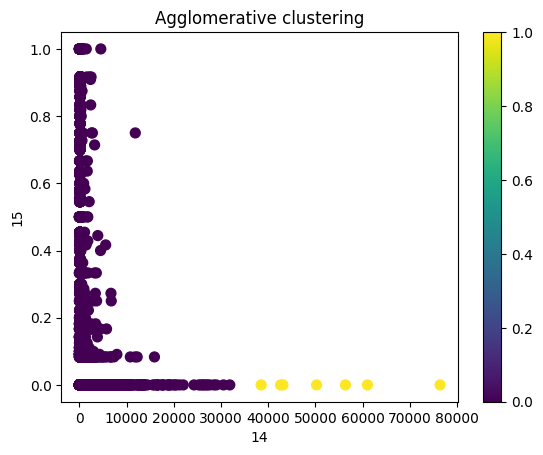

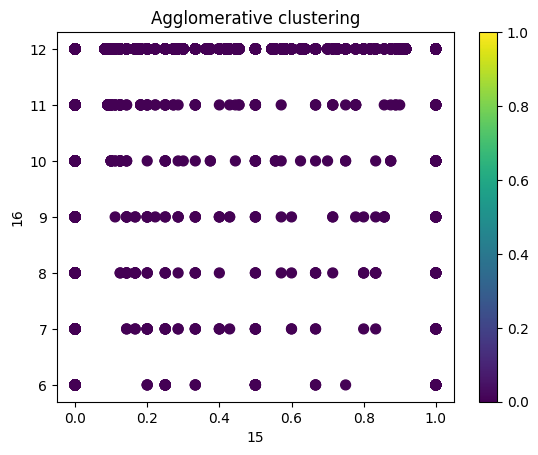

In [ ]:
len_ = len(features)
for i in range(len_):
  j = i+1
  if j < len_:
    x_label = features[i]
    y_label = features[j]
  else:
    break

  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter = ax.scatter(df[x_label], df[y_label], c=agglom[0], s=50)
  ax.set_title('Agglomerative clustering')
  ax.set_xlabel(i)
  ax.set_ylabel(j)
  plt.colorbar(scatter)
  print()

# **4. Plot the dendrogram and use k-mean**

## 4.1 Plot the dendrogram

In [ ]:
import scipy.cluster.hierarchy as sch

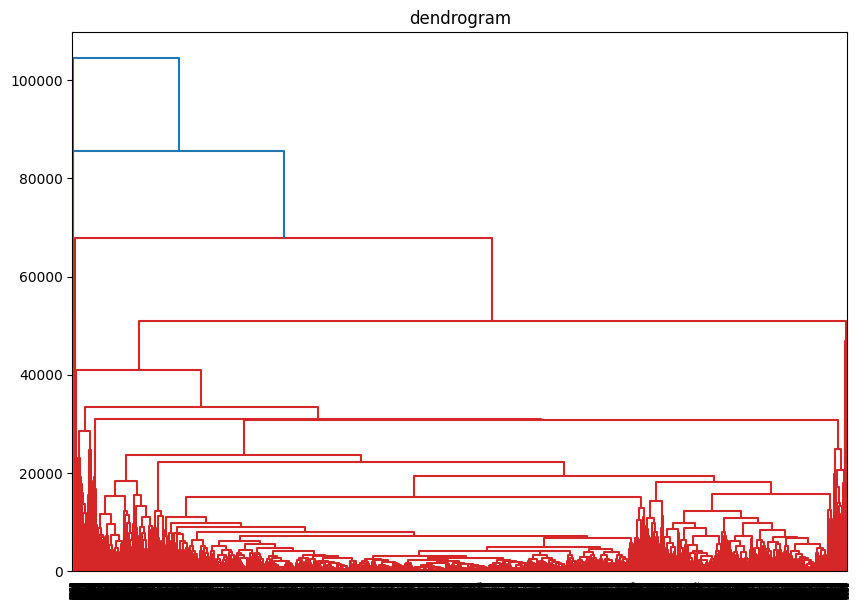

In [ ]:
plt.figure(figsize=((10, 7)))
plt.title('dendrogram')
dend = sch.dendrogram(sch.linkage(x, method='complete'))

## 4.2 Use k-mean

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit_predict(x)
kmean.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


279294559472.8855

# **5. Try different k value and select best one**

In [ ]:
n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
inertia_list = []
for i in n_clusters_list:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(x)
  inertia_list.append(kmean.inertia_)
id_min_inertia = inertia_list.index(min(inertia_list))
min_inertia = inertia_list[id_min_inertia]
best_n_cluster = n_clusters_list[id_min_inertia]
print(f'the minimum inertia is {min_inertia} for the k value = {best_n_cluster}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

the minimum inertia is 102881243696.40903 for the k value = 12


#**6. Plot the clusters**

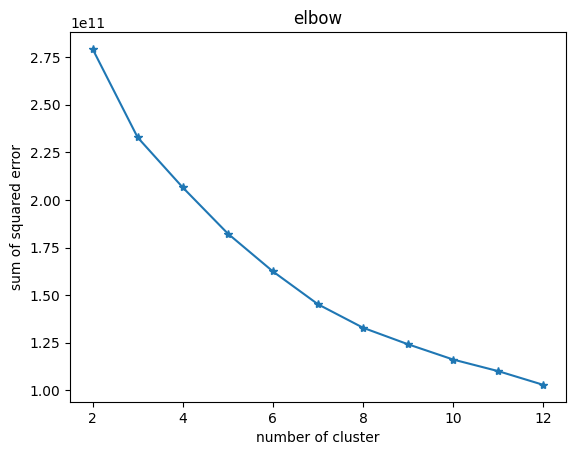

In [ ]:
plt.plot(n_clusters_list, inertia_list, '*-')
plt.xlabel('number of cluster')
plt.ylabel('sum of squared error')
plt.title('elbow')
plt.show()

**▶ The best k value is 3 (k=3)**

#**Bonus**

In [ ]:
# the other validation metric is 'Silhouette coefficient'
from sklearn.metrics import silhouette_score

In [ ]:
kmean = KMeans(n_clusters=3)
kmean.fit_predict(x)
labels = kmean.labels_
score = silhouette_score(x, labels=labels)
score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4651271398028576

▶ **The score is high level, that mean we have a good matching**. Not a negative value wich mean that we have too few or too many clusters